In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy


In [15]:
dataset = pd.read_csv('../../Phase1/DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

x_inp = [];
y_inp = [];

DATA_SIZE = 500000;

decision_tree_w = 10;
random_forest_w = 10;
knn_w = 10;
xg_boost_w = 10;

total_w = decision_tree_w + random_forest_w + knn_w + xg_boost_w;

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

def genDataSet (size):
    s = int(size);
    rand_rad = randomSample(13, 15, s)
    rand_height = randomSample(13, 15, s)
    rand_freq = randomSample(1, 5, s)

    rand_x = []
    for i in range(0, s):
        rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])
    return rand_x
    
    


In [16]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (decision_tree_w/total_w))

x_inp.extend(x_gen)
y_inp.extend(DTReg.predict(x_gen))

In [17]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (knn_w/total_w))

x_inp.extend(x_gen)
y_inp.extend(knn.predict(x_gen))


In [ ]:
# Random Forest


from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RFreg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (random_forest_w/total_w))

x_inp.extend(x_gen)
y_inp.extend(RFreg.predict(x_gen))


In [ ]:
# XG Boost


import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=100, objective='reg:linear', seed = 123)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (xg_boost_w/total_w))

x_inp.extend(x_gen)
y_inp.extend(xgb_reg.predict(numpy.array(x_gen)))

In [19]:
# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))

In [20]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_inp, y_inp, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
25000/25000 [==============================] - 12s 461us/step - loss: 12.7706 - accuracy: 0.0000e+00 - val_loss: 11.1067 - val_accuracy: 0.0000e+00
Epoch 2/100
25000/25000 [==============================] - 11s 457us/step - loss: 10.4072 - accuracy: 0.0000e+00 - val_loss: 10.1556 - val_accuracy: 0.0000e+00
Epoch 3/100
25000/25000 [==============================] - 12s 474us/step - loss: 8.7677 - accuracy: 0.0000e+00 - val_loss: 8.7933 - val_accuracy: 0.0000e+00
Epoch 4/100
25000/25000 [==============================] - 12s 485us/step - loss: 7.7432 - accuracy: 0.0000e+00 - val_loss: 7.8558 - val_accuracy: 0.0000e+00
Epoch 5/100
25000/25000 [==============================] - 12s 469us/step - loss: 6.8712 - accuracy: 0.0000e+00 - val_loss: 6.5827 - val_accuracy: 0.0000e+00
Epoch 6/100
25000/25000 [==============================] - 12s 476us/step - loss: 5.6345 - accuracy: 0.0000e+00 - val_loss: 4.7232 - val_accuracy: 0.0000e+00
Epoch 7/100
25000/25000 [=======================

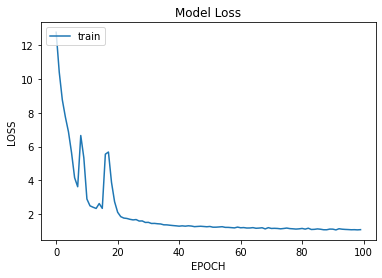

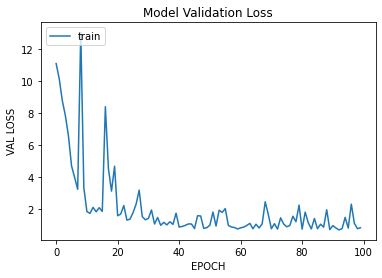

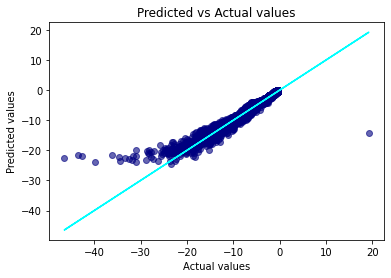

In [23]:
# Prediction

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)
mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)